In [2]:
# Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

## Data Info

In [3]:
df = pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

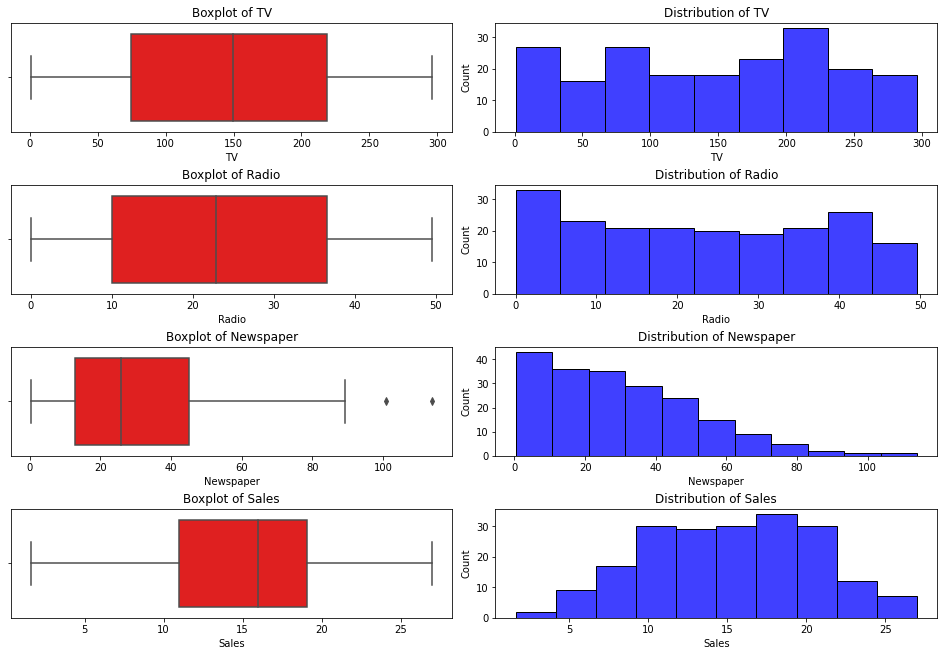

In [7]:
f, axes = plt.subplots(len(df.columns), 2, constrained_layout = True, figsize=([13,9]))

for i in range(len(df.columns)):
    
    sns.boxplot(x=df[df.columns[i]], ax=axes[i,0], color="r")
    axes[i,0].set_title('Boxplot of '+df.columns[i])
    sns.histplot(x=df[df.columns[i]], ax=axes[i,1], color="b")
    axes[i,1].set_title('Distribution of '+df.columns[i])

<AxesSubplot:>

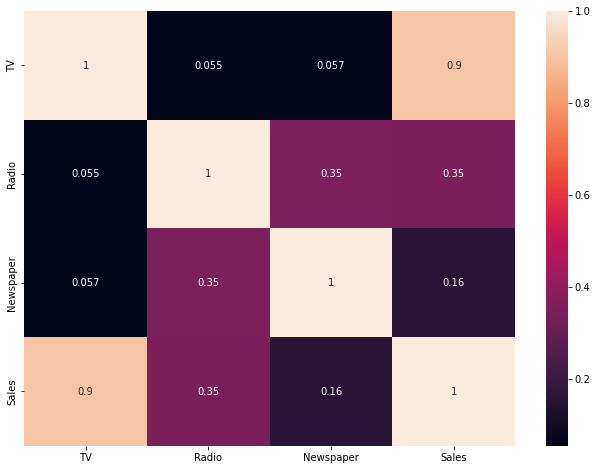

In [8]:
fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True)

## Data Split

In [9]:
X = df.drop(['Sales'], axis=1)
y= df[["Sales"]]

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


## Linear Regression

In [12]:
linear_model = LinearRegression().fit(X,y)

In [13]:
linear_model.intercept_

array([4.62512408])

In [14]:
linear_model.coef_

array([[0.05444578, 0.10700123, 0.00033566]])

### Means..
**Sales = 4.63 + TV * 0.05 + radio * 0.11 + newspaper * 0.0003**

In [15]:
y_pred = linear_model.predict(X)

In [16]:
print("R Squared: ", r2_score(y, y_pred))

R Squared:  0.9025912899684558


## Modelling with Statsmodel

In [17]:
lin_model = sm.OLS(y, X).fit() 

In [18]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2826.
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                   1.35e-161
Time:                        18:43:51   Log-Likelihood:                         -460.08
No. Observations:                 200   AIC:                                      926.2
Df Residuals:                     197   BIC:                                      936.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0671      0.002     42.078      0.000       0.064       0.070
Radio          0.1600      0.011     14.154      0.000       0.138       0.182
Newspaper      0.0284      0.008      3.545      0.000       0.013       0.044
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.025
Skew:                           0.026   Prob(JB):                        0.987
Kurtosis:                       3.020   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""